In [6]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

from PIL import Image
from io import BytesIO
import base64
import urllib.parse

In [7]:
image_string = """
data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/4gHYSUNDX1BST0ZJTEUAAQEAAAHIAAAAAAQwAABtbnRyUkdCIFhZWiAH4AABAAEAAAAAAABhY3NwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQAA9tYAAQAAAADTLQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAlkZXNjAAAA8AAAACRyWFlaAAABFAAAABRnWFlaAAABKAAAABRiWFlaAAABPAAAABR3dHB0AAABUAAAABRyVFJDAAABZAAAAChnVFJDAAABZAAAAChiVFJDAAABZAAAAChjcHJ0AAABjAAAADxtbHVjAAAAAAAAAAEAAAAMZW5VUwAAAAgAAAAcAHMAUgBHAEJYWVogAAAAAAAAb6IAADj1AAADkFhZWiAAAAAAAABimQAAt4UAABjaWFlaIAAAAAAAACSgAAAPhAAAts9YWVogAAAAAAAA9tYAAQAAAADTLXBhcmEAAAAAAAQAAAACZmYAAPKnAAANWQAAE9AAAApbAAAAAAAAAABtbHVjAAAAAAAAAAEAAAAMZW5VUwAAACAAAAAcAEcAbwBvAGcAbABlACAASQBuAGMALgAgADIAMAAxADb/2wBDAAMCAgICAgMCAgIDAwMDBAYEBAQEBAgGBgUGCQgKCgkICQkKDA8MCgsOCwkJDRENDg8QEBEQCgwSExIQEw8QEBD/2wBDAQMDAwQDBAgEBAgQCwkLEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBD/wAARCADwAUADASIAAhEBAxEB/8QAHQAAAgMBAQEBAQAAAAAAAAAABAUDBgcACAIJAf/EAFEQAAEDAgMEBQgFBwgHCQAAAAMABAUGEwcUIxUkM0MBFjRTYwIIJURUYXODFzVkdJMRISY2VYSjCRIxRVF1lLMYIkFGVqTDMkdldoWVlrTB/8QAGwEAAwADAQEAAAAAAAAAAAAAAgMEAAEFBgf/xAA2EQACAQMBBgQEBQMFAQAAAAAAAgEDERITBCEiMkFRBRRhkTEzQnEjUoGh4WKx0RUkQ4Lxwf/aAAwDAQACEQMRAD8AR44UbVmDlURePJYRi5ptzuEtltS34quDyn2m7yOUEQbkd0XwlbHGzqyp+QpOo5F8SPcsS5keZWD4RvpakpycwRq0PpSHIUrFy3JpEEollpXNptJz/KJ8OhohI1oT+rxLN6sjRUlVDeshR9yLLuslc1FojgpRpXMRu1o9w0La3kVpPoV2XfaLBzsFKAfZMfb4LYg/DUfVuJzH1SJVfD8uSJKUE6dizER2bxGqujdberKtiNjYKRG3p+nqEqCPrGUjxW6em2BSDJqCJFuu1FV8wLiI6Nb7JdCakIxm5Rg5ufF0lX6ohIlzFx8tMhuN23ouS/ut1xVX8H9oRM5VFG1H9cCteJmRNd2urdOp6Dq2zU61PUtY9SN6bpPUuxwvxFV8WKJp6Xod40YR4s4Xs3xUni5fLaIip43l7vFR6rEX+n0j8s8YGOWxAkLrTLZkTV1b7tb55ncbEloOtHbqPbOSNpuLEMnynKH89TCXZtUR9YwPDfRBXRB83SKrp5udEy2GWHcoGo3bEnWokXPNsuThiyxVHtNTTXHqdXZqCyuK7zSBxDQtsQom4RzpDGMWqVeh8JvM5aGI0qTFQVs1np6eiDAfp6fJF0+/pWKRlOYjyvQAVJ0TVXQ/6LRWT3piXIhC8Ve8mcrsBiz8mr5UPlyfQ2F0Obf5rhVRsv40byfaaVLZWxxPotNUhD2+nZnR0dHR+YYx+Qk0+9YRuX2RTQi3eJcU9RVE68nyxu4bu7eoNVlwWrJJvtbiD7y0upfTiJid5GqbMtTPSWfuaORxAhb3v54/JH7lkta1d0yG2KZ6WTMAyiKJs88i5cSKQkrRNV3bJ92KkZJc1zilIlLteH/pL5WnNTUwj2KvRbGbLKPHcpBsWUe5bcO1zVog32zRkyrRtbLxdJVvOl96Iz27kUa1HVsrjq9GnX5og8l4kQHVtvKQZWgs5atXE0pekoNtDt/RwrYhpfi5NhkqscNPtInRVYNiTmXsiaF0lajZCvLoL3lGx0lcyseJL9mtMxytPw0vzM42b6RnNtBkkndvjKpmd+ZoM8tS7FwbsokvCML5gxJXUlJR+75UTYhHJbSVxcs7zDdppapPZriIqiSdsRjzTQQyfaaNcqfJ4bFWiDWmn5f2M/xApJ3T/wBaQgm3zFXxxrS39XCTypNnbLJlZxs9JzLcS5ZW1X+skHbs7WEmNUyW1t/cfSop2HjeIibf1S2QcPTcG5rScduo4VuMZC/FKrBS5TVQ3/RyEqGa/u6n3zlbx5pdExLF5Wlb1HElLIFqnYOSlW3ZhNRKXWaeW0jqtBKfSTy3IPqYudkF+Ev0I8zONg/9Huk5F/TzYTiSzVshOaLM6RVvYw9AwbPatGVv7kNIKs2c2Zt2lm34YxW7aqinxZXghqzTqLjj77yxy9FU7kOm7CNvzKmR9LQhGZA7JbJhMV07etydC6iyZlu48TKpsVGOb5VO0GP4gDg3MXaFHC4q874qU/EuaHmLUcIZBDzVxbRMOdNx8QqyusMo5GSPLw3LYqkq1P6pLKWy0vywYXgXEwbnEhmaUg7jOIGWUkiW7m6rJ3DmOkiEkRNO0uSlFcFylbHmMbQlJ9WaIoOMpSLfdttuSuX0l4So5KkD7IIa1qP+aS7ylLLKxzy1wUHs7wkjeVBdJeQe1/GSMh2iscu4/RyLrunoji1DEDJ9+EsbxwkmjlvH4jsKmjBzFKlu2xkbby1WmDiIPhbDjP8ADIgcbHNnl4UJGaX2YSlWts69f7f4F6dfLKxnbfFGiJtuOW25krvqxOKo3GIlG3NKb/5YqHwXbSFL1JiBhOK6QkRLZ9jb9lKrh9L9MRDjZxcQt89mZXXKnwaGyUtpys82/wDX+DN6gkrcpF4hNdp5NjuslcY+qlV8zrTlR1VaXMHEaREPUDmJr+HkInaBXOeFa1GxRlVXw7m3b6k2YZQtyQjLrAvyuEqWqwq5WMs3c1BnPxzmLI0fwdQ6o7RBkY8RYezxRDTmLG0HVWZnLPtltuXuGW4SvDybdtu9Xm/GSI2bXjh3+3B58f8A1UnUty7ilWxXE9eM8TDXN6o582/fhEV8puqHdxu7a09c/eV5rwzqQtQUeO6UrlxEEyBSf5SvDdz4xfxVr9ANP1NkxYewkuztOo5tmBRr9qO4XvVheB5NrR8fhkwd3JCn5ZrFlud1mdJOB2i9q4a89vNrfSBITZf6zEW6PutW6rY5chayqNi0n7J4medVgJhLEElq0xHiRD8jS6ACL0FKXp/s6Ojo/pX5uYtfypGLlR1B0/RNCQlKwDZzpZ1vmXz0S834qDkdjt7rty5blJdIPM3Fl4xXR6S1EsZUwqcptjfzr/OUjSbr5xNceHce3F6swV883EiuqIhqdxCq915cm7zTnoI0hf5nSTyQ9I/ydHT0/m/L/T/YvzvG2MVapgnE4hMq0peWpIL4jcTnU1bYvFW7t8b7yfFccrH6Kdf6eK3I76zzj217PASaD+l6jber14/+JLL6k+kJyz2GWQqEY/ZhvSrN3gt4392+ueJdQ+XefmR7A6i9vc9OR+JEJJE9F0xiNLE+7MWytbtjXr5nZ6cDMQY4HtLyrYMS8YPKWzI7Wzrg/hqyQ9JBjYcf6MMSWh90JMpwtLmb+3+BVSM+W0e/+RpiZhvHNqsJlcyPS3nO1I2llQ3lGtGw/raTuffUZMTbtsPKbOEyH4ZVT3EkW4hZnjdfcFrt+WBx1f08oKRlyD+/KPqkYRP63/xyko9tNzcp6LiXL0fMJ3a0gdN1ZzYm2P4gkxKVVu5nnLcyxBl46btuNUrlt4mZKrATZzYY/wBLJd6P+6LdtJ8RIiWbSg7rRzb+EkYxagzd0meSWfnNMmLtTr2HjiWg7loUi+IT7S2EmEO+jix7zrRH1NtQo/Rr1k+yTZss3eOd88REDm5v4Y0m69gartU6wBx+JtWakfPVDVXy6gKNepPMXqkL6i6opMsiLajmSLPNh3flFXieqCZGUceKt080vEQtCVBHzeUzsexZPyy7fwuahtHYox/DP1M6yR7FvdVfcFLUBM2snj/OmwsjRs2hYmuM45HmhN9kXCq4U/VFe4mjHLMKenKUg/8Ax4QhuVVDHN0njmiw0lI0onA9VMIub2aRSM3NPWyBmXZbglQyPv0gcNEpamPQEzOYc9oF9pKsjxQe5Gn6okfYYR1/lLUKk+vHAVjfnAFC2w3qC768RrFolXJsg4Y8juCCGO0LhpHKFtaKshBC4yq7xstaDFyNkLEOp9VsRdvZUloVug/I/RTW74Q/iLnBbmiVK5F9dWV4mYiZZx1YYSxWX7XcN+KPwlFSorUbHEFuEYSFAVlVuKlWO2vWWJpeTiRCcvRit5m1a0lZIuoKThG5KToOWyThtpWyMn2WurH6ThMPaycZunKhxGHMNS6lwot5WwEqS1T/AFyYG2i3FvTnfrmlzVayo+5Ym/3FrDx1j2/kkZxNb1B+sdWQf3Zkx4ar7wQaEqhxHOjac4MTq54qkrCXFCEi63YO9zuiFp8wRVR8XClK4nDfsgrUX4rVO0eDK4cTxYmqZLMqv42Ybu5fCN5ULXtlPFz4tX1Xmq4R5Sk3uzxbS2Ch3IYTaki6iRSzOmqfdFcj7xc2n8ehceC/N/eh+kyLiX/1fUO4Ft97yl60+jyEt7rIvh/EXl/zb6ElnNaM6xyjHYdPObpdX1rlL1IOST+HsJzaOXd9xOSiZySedXoYInLhyLSuFV4h/NUwiYvOsOJcs+qeQKPVbDJbYp5RdpttiQs74xtCueEVI5isiicWRcRFiSVPxGx+H2HEpgv5p44/cMAIi53mzbiz+R8xHCzFlnMdOC8s5pyqBCutmRC7iQvdK0Q8/NueLIlV8iyyEvl7X1wx1Y17zWxVWlJWFZN3Pz3eUB1Oh9o1a0K2qRyUoixxPVkZQ7kzaQHLXitiCJyy21tnnOUlVlZVh9KcXTz57DuXLpg5y4+aJYvBthS+tFmFl16egqbPF6cbid6isbpIYx1ZPvNqz1TZ0n2hzqq0Q+Ice9JlHU25iR94MqxePpsxObc+GmFrqbFyFQzwskQvZm5E6qlLaaXFFvsRpTxfHd7HoCVop2I5Ol/j9SFOj4otuxNwpWvepQ4pakP5hOiV88XC8X3eJ8sn/wCrAqbxdxn+jz6M3VeZmmOlsVqOGexgiW2pUj+jy5vYmjFeJdqczw7vsddKDRzWk3CoKEwXL2rz16Vuf+VypWPDvAx88ZtIHzlOtcpdu7KZQBW2ksj6iu/C+WJXDDugKxpusGdTlaCE3tlFqF5RUqltNKatmnd6xEf/AAzbFVEusxE9oNwzImTccS1FbbtuGNL8z70OR73oVGN6Ei9jSrUqvyWj3PLaqjS6J83I0ftMy3LxRkXnfEifw4oWYeUQWiKqmnmkXO9ZMsLVFdW8Sj5pCR5JF+XLN15jry1X9aSFTWi7zaE2H4QtNT+JVY09LqdHw2GyztuBx4kYTib2f9HATn77Xb4iQExAoPyen8vk+blQfR7yPpNwre383h25tu56rNijL6s3FmSognm+Udb/AFxnLneWhLm0vDtsqfT77zqVNo2Weaf7/wCTF5l81k+n8rGmYiGB3bJWzDerWlLzEfmoSMGMrn61G235sJGVpgnUMAPaMC7FPMxeHbcpXDxseTRdBuKerRr0fmRMDqdag65U5ufqxhG2jqEwDp+WgdPlOXvNIW6umMY5FzoiKX4i8r4F1IFlQ5KY9hJu2krZt+2TvEjLr1J9O/MbJ1yELWLIoNnPtHsptFq7uDLd1F5jxUxjaU+3G0FHCcuHPLzqeea3UhZfD+UzRt4jKg/+1qJmg2OQOBqFWEtTl3vV5v8AOcm/R9N09d7c5dShPlLfK0LcI3XkfzmJvLYiM2heHGRAv4q3SnTNaPqZvJqvkQ7ifuIcZbqa20IpTFL1F8h2hdnndvSdlRiHIJR/VkPR1Xoe9CObrgd0VsfNXltxUjvajiQdCzMo+JmtT1bululQPTRsO8litHJPhrz+SNdk2fCZsRZBzauubiyjDUekSFlepprvNIg8Q5ZzHt45rLTlTzlq7krm7DWmN5t3TdWUu7f0RlmdVF3mOt7s2f6V0SR03T4qNi9ktbXiktW7iDxMfGbYdkkLX1RNsJn5QtNJWtm2LRAzR633kZIR2XD+qKC4ZINy6F8q7pJPMEaSUXVDsvbH2V+WIQraMriyWvMQJvmNpYQvxRLNyOcy3mP7tdf9JdFatKjTta8kjUGSrxN+x6oZvmgiDterEWoYb1BEsnlQQb+OL6XbXe8ueEvPbctsgzK+R+bJTcxlXduQg7T9sQfdLg1V1Tv0aq0iPaRuvn0ZFaFF6NLUdy0ng9nRu9ukRjA+duZij8Qmrtt+mdN8Pm6Vq6s3cPglkHGrqLdJdMb4hR1l1r2kIb+cZE4b4+PC1QG5Qc5Gii3Ol2b7St8cYXUdWX6T0RVhXMW+1cxDCzrZeC8YP1wbh9lbaqpezck49FlKy+7ltrpRMdzzbU78s2P1Ag8KaZp8Y5B1U849/dhNhKh4medPh7QrNxE4fO4yamBC9S1BL87yFkHJLT+bl3vxHpVYKXfZbdLQhjRs9uWJkn8vl8yblspfFXF2hZyQkWFblI3l3N162IK42IVXwfnBXHA3b+k2z3LcvIrPFZ6DwurfFH9V4P0fwiSr3TbKjZvEtpTcs3jtMBVUpf8Ag4eecFOPXFqLhNnXeW2Eq+4jXdUvNo1GZyT7Otoi/NGg2OrUeMb4hO7ioQVpNJjzao/Jk6m4mvs5yxyrIVpX7XV27a6enjjHpBIu07EnL8TK2dptwom2NOM73TRI6ghKho2YJB1aLLOOX3RFHvf8xeffZmXp77ivhnlm5plLiFkxyJQ6jlOPLS+lytJKHb94IeqmBBLz1Wo9RsbHn68szY3B7vvSeqCmbQbx2wNbIIaaW1U8QJsMbTbi7xHwyibJlCqyNjTF0Kmb4LG8yuQkpBz2owiE7whbiYUOX9KG+atW22qqmQhkZByRYiQ2hpd0Req8OrWrZtF4PR1lumJsDguol5FzOWaTY9wLmfh8VBuNNfRqVBa0XptEweYephzQENymWT4iNhMa0bu2vrzbefirSHD3LN82XSH3ixurKg2tXGldyeWyo/i96uR4zUoUdn0somSzw+i7tmsbjUML6t2IzlI4pu0kEVD1xiRHyUG4iYsz7MFJ3VvSVLpfVcNzXuKpK0jclIcHT7xeJR1Xit+p6C65YWm5V8sL3rYPNnq13EVpKUaUotnzkbn9T2pqsjzXuRFN1R1brCHqG9ptnOp8JdNq6144TMGPZlUSW7t7XerxXjZUnWCuJiQ+V+FpL2hlo6bZ2dIi8Z4qYJ4m0dmJx/E52Hu9tZctRZrjlcykplaIboPxlHd96nZcuslGI4Xwgs17kRd96zG3LuF2PYGIFQZak3Fq1ccuRLD4ejTVtIbJFpjLxCd2rBXk3taYccIbcoxZa2rpgnCBkm85anCxxBZXhthEuJy7Dju6+u4xXVFya5eBtmg7fN00HVkaGXouYif2mLK/xU0cUSH/AIyqH+ENR7IExtm23Lk1fWXyKhQVaul0M8whQ64e7W60ZUVvacvd4vdaSo8XE6lnvd1Vgb3tjjduuITVQ8HCRMvKOHcpHXGY+WNz60q9uppsvyzdB2r8xdCXS3OKtAh5cos4HZ/1nE5VZmzomgv+GPlkknKskHAUcyJda0aK4It0Vu6uQyI31ft/Jb5rSbHE0DdJvD+HnC2rmH2fi3I/CdFzIl5/w/qm7UE5mv6zJn9TwlvkeWmWQ6kpnKCjouuO06lvf+UvK9Ljt1gOJdcQj7Kk/FSaVPT6lleu22U9LoBzj40tVEhIF4jkqXt95kE4qCIDRNUSEIV3mbXCc2uIJK4d8EpHCsOUsQu64O8iC5gbv1e6mhLTJvdEHUEh3D67H/NRDdzmYvxFJMvlkNxHmH8B9JFcUvSbo1tvUMk1ak+FzV70cZRkzbwcM0Eyi2I8qyZD4QxL8+6HqgVJYgU3VjoWnBy7WUJ8pfoQTZ7lu3dtTXG7kV0RF6HwKmj9eI4Xjf4YrUjdEWhd90rtEXC1CL02ljzTY87qqUPGwQi0mN3Z3hi5FbJ3axPaa0zGSrWj0fU1gURCXd+8PwlmeW9y8P49i+0ZrJ6jwxJhbNuOHLFYuM210yJwPEicFxWjFx/DSPK+9J3mmMhlxmVH5oOhUoUqvMsFgkMVpYnZQto7+IqHISxXzjaD8xXJEvIh7aYmyooFHZqVL5axB/V9vGRhcVB5NSDEmNKtuvuKcGnlAyd7zO8UnWCbbDGIU4+0vFXOG1pCIVZl+qfcLTvzf2Inj5291n7ty9J4hUjmN2cN5YXEEnKXSg7rNFm080X+5rG3LuHEPpc1WCoGOZj2btqIX2ndlQ4Mmm3/AAleLtxmQRU6J4sRORS3kbxNUqr7htp6ptNXyYbWmapZBJ4J6owLq0VSUPFmzYiSEZ6Lff8ASWwDKvFeA9WlpfEAcSUrnY9Q7qUf2rlFXsyL1R92RYvCJZcWxMfxc81Snq28txUNB24GcIS6Rt6s5Xk+pMPKypZxanqeKPxB6gl+jnxUnqiltt721LbeLAlqY9D82x2XKkXpivMKqel3G/weyZTvG+msTrDDecpK2a9tFmX1kY+Gs+HLuHq6sXicY5Yg80X1ZXTBOpGjGYlIkvNZXRaqIrSNkGOrDCuSFNRAhS2We6o2BdVB0/RtQ5gdZUuZ9PQZW1omS1MkVP8AOJp6gtqGTY2Ngbvc84G0FxCpfUktH9U3FowiOHxSwwssW4W7zVR2cuZs8s7QcxzwRdxuKpvJcrGccVZzC3SiHcTqG0y1PU3e4HlUGE5eK8btGAdzbcTxC90rJDtgxrfZ7Xs926qXDvRSTwbTeWTjlXHPE71Xgba1zly9s2zX5bltCnhuadwwThnJWlW8zaTQZVA1Z26nU8pTCKsHN1BT7gVOFK2mBb0yIPvRaolX4dsKpMTIut2ARDbzkbtm34vCKr5T5dTVUlH11TFbOJCmGES5bTjHVzpCdpa81aam7LlY1TSlSqGH46EF10eaItxgP4pVmcR2dPK8q3rJtSocp+tUvu2pwhNUnj21pmNXNTwpaayc98WbO28YPNQYxLmd3MWlGRjp3kG3GbMJKUcupliwOG3zFbKDxEr3DvRpKprbP9nPR5lsq2MSIyWonUpalUus7xbU0qLjUWJ+5tA/Oere3q0dSpCd5dcjSOoMbMTagHvUsOOb+zxQrazcaItp+vX+GrNuxMmy7OnLTgtFJuQth5S1piVgziq8GnhHK5jcRTgSEL3pkjnCiK3UcpJW1VyOUWTdgAchbSjzy5xwkvTknEz4co4bufGTC0LvuhI+ao86X3IsQ8p7BDi14qj+UgyPrij2l3KZYIIGh3jbTUYyqRwRZfixCsV+PclbXGni3VaGctqKpuNOU+KjG5dRMxJnSWLZKObtwJVT+YrQTVZ5tVtwNZnIVDhE7xjc0ir155u+KIq/iyQczIfpRG8QftLXvV5P8tRwc3LUbUEfVkN2yMJdH4iTqsE+z5dD9HMjdQes2S/Detomuqbj6mhruXci4ZOWro4bZkaerZHNM7rCm2lSM7RdMnKINZHluJHP9Nx/CIt4cCtEVHrCm86P5l1MVsTdjP8ADMki5HKSxZG5IVDJFdNrnLtabUSoceWOZOOsNL0w+ouUFurnJVTkhNtVa5aE2ZjtNN3Yi71UutHO0hkdsDU8yeC9YcxNx85Q0oZmaakRET0+Je25dFZmfUqdQamckatkZORcPuzN3pbjlyqvMFkZIm4LouJ4hn+Zy4uK5ccUiskG5j844li08K56jcJ2ZFl6QDSXTHFFsfRY3ezsk41bviKwbI+yNkn2mFNG820uWtVRuuRalR1+n9wgfaEwbiNwbK7a93lFXDcyBHHhqVl0fUrWozfSMHj7YEWSQ9mWJxcvLU36RhpArJ5q7wNahiJJfovs71hzaWPuM2TdBal0tpdTZvlnJqy1RsrlfmP6rg+XGC3Yfd3Uw8FBvCZmoLwkwy11wPlpbTlUMXhGlr/UQZCNBcVEE1UrkI0peaJCZBZGclw7ok4/OUaVsyyMk3b7Udlc2hWh3C8NPLdsak1B7NkR5NR8NRkFdQbjhKjVYXiWRu5aF+IiVQuYr432eVuNSu+JvTEc+q/5auDxsEqTkiO6WtdccjTLcq5OKuZtjXE0cRmopLdpZregywP5CDeMXfcp5d96HeFMRUpVx6GYsVduydvXjePi49y9kH2k2ZNh3CkXoegP5PvziasYdEtUZaaoJuXhN5lxdfL0Z/J+YJw0JhmLG3K5is6zvCjnhPUmF1aBK4oikiN46Tlsl0k9KPW8cLVyDVzvLZdvYtg8yuUvb7Hndp8VqrVwpRaO55ckP5NLF1s3JszF2g3rzltnAnLa6vPeJmDGLuDlv6UKDfRLcukORHvLEq/SBmORI3i5Gl6DFIuNttXWZZWiK2R9W09Vo3FJ1HE7RZy5SsLZG1ts5KLitk6fC0/7eppvEtqp/icy/ax+Ncx3qJWx+eJgU0wOri1TgXPVepbr+I+zd62WLx/DH4WkuO6Ycx2KG0rXp6ilghyXW5AphsTMt3F0tu0l7NOJB8bMJVx+QR1OhMnaay2+cpEQ+G8JLuBhEErlx3ZCKvs6g2IQjtqKI/FVswrmzbPeGLxGxc0not+aLCq7tR9TWME4TqIzkPRJY5u5c3eJpL0RDvY56Puyc1eR5itjDzjvZ0YTStDuCKtEwrxMuSjynpl2Ukw21Rky2k5EqGpKpzG4+Y3iQgMzwlkc5VscxIRpazpEwrSspubZkj4u6yb8UtvikWbzBI5s33qRbMiC5ZEeIGJX9rO5eQ0uH8JRzDZo2hyO5mRyTcXMQ+0hU+3vPwl1eEMfFcoNnCO6ty8tW+oMXZo7u1x2qsjZMeuXh30/iIyMXcuT6pKyb8tsREDhLfFVstd1dSd6udU2p6lQuTZEqcwQzjTC5NxGayrbN6YfCuojNO/7E7M01PHdfcNM67uapkwGUvfJOPV4of4icM7XxFiLkC9PCLt8Cp1Q+3y0XlpXpXGbv2beiKOoHOdmHFrh3dNDvC2xuPhZVdrBYjh3HnJ58rCODbahCl4ltEXN4XR+kNDk4l5QPLN1HwMCF01Hbua14qgRaTiURC9hxF8P4ScWtNVuLc+9XBuRBq+hml6ihBONRWR5w9JJxiWtdjGo5dBXlriuEWxtM0nbiTxmVA1V35pCZcfUltCQRGyYfKQbwhRtyGLykjG/LvFouJX3g9RfCZ5YxUv4aZkpTEA/LSucLai3hhcTLFTlLnja6MgS81VQpqY3H66YQCaUxhdQ9MQ4h5eIptgL/llT6wh6+p2NPB4XeVMuiM5llPwfSFv0dHk9AOjjRvT0/wBH5PyLN/NDxsDiZh3H0a/kBdeKLbbLK29tYC4RVtnWlp6/p/DXtNjqq1G2XufN9ol9k2niUoFeQL6mfJlIotOHhIx7NdbIGWmJITYUTKr7jyRNQYiTl1oKp25RtX+1W+7MWT9gW0rRMVBRrlv6UMJyP7S2uKtzmJobeUhglKTxFWzKscU3Fecee5gf8oRs57h/S4i9obTf+avBce5t5gXhXfmiXpzzuKtaPpyDogshvja7KSXxeUvMbjKNqgHq6fNXlNu/3FS/wg9f4ZR09ltctEeXh+KiJgdxmkcOXLXBF5SsHFbkD3qi0/Urgo7jipxFk/tS+UbFQ7ctoienCMqfi8pqkfP3W9opraj3ts4HIsOILhKljciJzk4G5Nb4qriTk1aem1y0TFW1vUFzalby9sorVtsTLCVfJaGg89IlSOckru6LbV1U3SpNUbE2yHhPSg6hflzMp6sQhOzKwXLQyXdMar5JvU3CPcvfhiUZI2p331pE5LwyLh1Ket8ybnpaTrS5SSQm2mmITQrnxEGQbtzxUQ3YyLIdnVJ81dcKQnKWmp4dSpaqqL8tbIutx/cvv8SnGl60pHAxD1s2x/xOqs1PQJmyF7OEaXPrv/liqwWomIbuHYnbkaXsymQ9YOQ7DJrc1V0oIvEGxXEobMlp5mypfMOfQ+U5j5zmkQ4KHLkVXnOGzaXuENV3aOWbHJhR5H9jGh3g7ajZzYRDHpFTR5JNHo/q4txQM7K2Q7L0kDblNyg3E43tyPVSMkuG5uoSqTa/vc/irGlm7e5mRaI+EzJCaKcZnZuiqWzl7pPq6TJ8xWAhWly11el/DStHiyvBpmy6SSOJtc3Ld1krHtCNJeFRD4niXUYOpKmek1cOHPzCKjSeeXf+otmRSwD2dxiy1v5aaDcx5eE7uKlkFU5P+7Jz8x6mjMVTD4VERnzHxVC1PPmkdrJHLNiyEynKd3EGR67t2dW38NL/ANMRf7vQY/31SELWNvVjoj8VD+FHK8Qby/pOG58EtxJ5hy0EThfxURmaxHyYwfykOR9WRB2XRYMY/DjRJyUlU1qegjcSTQXJ/iqMj0JfD+aucbcETtbH5bZJ7s57U2/wyaCstPLu/UeN5I0bIN5aGkZeOlGvZnLItu2vRlN+fxU9vKYjYWdY+9kY5yJk5XlO7Le1qO7Ie1FRUq70uWQa9Bdp+ctz2o888bBwn+4eJ9zu8sxWb1p52k3JNyNMPqNLShP2jIlzLlec8sb9oufxUPkndv6wc2/iqzzHrJEvhdJfpCHnbCOylK5cOSXXLknMSeoBJhkS+1l/EQ8w23dIVcS/Bo5txzNzc+anjNyG4qmz7OnGW9yey4i1W/LuDKgHliKv6KcSF7LpIl2Kk4T+OCKPPOx9lduRqTTQ7haF6gOSSdk4rsq64h3A1GtahrI9SM421xc8T4acN2Mg97BEyf4aXt6txzH2UVPeFpogk35xXGL1H/CQ+Vy+W6z+ozVmOWLDAlJVOUerT34hRIPqlIiJ+rxUGSqMf+9oL5bEqj6yY3NvVKVH8SNTND+uPf8Agcu21V6QONgSH/DJVw6bnGxB5WDfDSMlbY0lGT0tB/8AtttEbbxjt6te08L/ANEU7Ub/AFfuZRdq7ZMpYCREsXim1C945WZ15u0xskvEFqrRNt40XNLGmM/dqbtrJ6kcu5eceSLqQuEck7Ra4qqocfMKr1MNzRFhW4FwwiD2pVucsuZjS+ErpH2cwMrr1bVSMjmJc1ppRwhsxWuzCRO6o2K3AvflJG8bueb8S0rI4ictpF4lpGRbbMkbtGvYyuc1bImEw5zzwjvh3VDqcWIWtw42M7HZYuNVpmRqQZUwmG2pdSv97GnVJWp0HRV9Bw3vZdWSPzffIen4iJko95dqdsyILh7tcuJp2Fm31eWkvCr0Bxy5t5xCm70qTuM2Ul66jCPsypI/Z2cslM5J8NIV1Ubpp+UDzMjynZU0i5eR4JdREWo+5wVJcaCS8dXlB0U7Egy3VGQd3vVJmQj5KHI+ad0laV+aSfHiyB3DY3shfmFStNByXe3SfNQ8g+DymiYbsK9m+9LyQl3mphnrqjJdVKUseohpZupXyRPjKPZAebmSfDThxtHvhIMgnffJtwv+0EY9n9yVEZmO5TRB5YvNdojyMoh0mN5wRuCi7lK3BLo0wcWe5S/5SFGxCaFboVdmXfE0G900veacgiG+lcEuhDCvhzbhxmc63IGyq28vd0rAzc2iLpS0V5pc1GYVe6XuehD/AM/wU4kBZFwQKV3fBS9MOGPjV7pBfk8FEXfevhK1FMxPY7d7U7b1S18tEdaahF6oL8JL8tULYnd/NXOJKsWw96M5+8qVnZOYoSmj8tvf+Bh1/qHgltfxU0i3IagHv8eq31tnLerLCJ8pd1kqH9o3PiNhJealDbNE8sRH6locMXY+ytG1tK7k5zY8Q0rHVs5zbRPlojrS77kSPNagK0mXpAvlHuSbuDcwQrqxt5/21qGIFW3af2TabXCkEsrJzDK3ZkX/AIyGrLdvYkb6vzdJV+i/STzaBe6RjxyZtF8q25uqOmxG2e4NzOWiqyvc1TW5pFN6Ug3tcpL3DkXy+KnEeITaYeWvVmyq7gShVct/Q3iBzGokdr3KwZX3pPzE5eEejYlkp9zuYw5QXxLSeDchVbi+5Vg4SkZcgyNxxNJDs9NwjV/BuUtVyMu3caXWhedqfDUZEHmdP+lRkK7Lwk3S9Q8gy770P5aDIQ3crrpe56FuzdgNX0JEPd96HzJe6XXfBWzDrvvUeZL7lxEGihhDIrHPL3fW0vI2ucWRRjgvepX5aYy5CYJMiL9oIi1bHxkGMSISmbIdEHXfehF9+WuacxLhgdQrc4o2XqyYTgtNJ48m7uPC1V0EbIWPG6IeWsmuj+GpJAa3cOGE7jU4qT+WmhBJeQSHUCA1HcRKGIhyCue5LRVyDb1JHc12o3FURPi/hJ2qojRfsGES8jbumjYhPEXdYI56TSL+IiOEk4hI2IveDaW/qS34jciDZsYlyTegvvlpoQd0fGUjdjHtm5JbaG7sdUpCEU6Ji+RbrrpmR1w9ESoHmyzbuLSVTeF3dcO7zeIo3GoQbTvV0IYgFcwTT2daFpcxPKa9T+Kq3MFzLxWCM4aEwuEG+Fs+Ud96g8tEkHvTtzc8MSHZ7s3Ual0W/NIcKcPhJXIcRNEO4EsuMuRs9MiuDguZ8NUvo5aeZm6h0xmQxX2O1bS9EWvGSMPWTWbBCjzPvUdr3L4WYmK2J93feoyL+qK771mQ7M+FEpVEsxAB7vvXwv4RQIDCdwNL/lCRBEGmi9M7y18LkMRbMWcSRdbtKMiHuJsAMuRI8HcVXb/WFrvdJWQhVU5DTcJ6Qy9BJZIMtodlNHmqq23JvGlzdVOVlQHEVPB20rIVWSUbXR3hc1V/LXCDELUIVEq5D7r3BFErZsSnmUeTbxXTJwIXEHwlX3DHIkslWgc4PSGzJb9nEUZM3wcoX8JNG73EIfZeH9yuLuttWcJ0HT+5W0h1yKkrsvSPf+BGrJB1BcJZdJe4qgVz9Xv4ik2tBi/qn8NapRpjKrLUXHAsjgdxVfEhlsmh3DviXbTX8VOG9QR/w/iKl4yS2e2HEi7HqvyfFVS0VYgZXUz9D570peF6tqqQYkvu+i5B34eVTvXqTXFbO1mPzq4DtW1U4cd1wrQMSBmyGYjzStjQ6kILLWwr+pRmREo7X+ojERltP+hIsHFX0EY0Z5CMbtijUflpeJTqqRjTAaARessZMh+RKvtSDc2x8JdmfCSsBDVMegH5aHRhCoe4tMuIStkQILy0QQqHRmZHIdSoYiUZkDk4ijzXuUqiTgj4XKJR3FrS9QciTy0P5akuIciYlPHqAcPVSOcEnCXzPCVUCsSNuTc2Ze6LaInA1W48t1u4jv3pPGZLrdb0fUAtjNtmYN4X2bV4arbcfpRv4RFZKTJqZTllSvs0p81aAyKvVGpMPPFVokHIa7psbt0H0ox0lI8hAy1aM2jq7bctrpEHTfoiQlIMoubdW1dY5t4P04m+OKbNb/WEpEPsR3b/AFn/AM1V8cvIsSaRdNGbbkXvFtfLWalOOZpHsrtv6BGxJAnOUfVuQF4nzFISqbhOyW/mruspvZFL+GFq1SPZEhb/ACKj1QQ22HAS+raS0DrbltbKCWTuC5lw8d3u1FuqrZqPFlcGu9ViMhbbciTvC2oMbS925zdRDzhJXMertPZlSz4LiorEYQekrAzLqDVfgx7urJFi3xIMyDHDoXfCQ+dF71G4Q+W9y1mxmI0ZkTAbm0kYxWkZbupHD3NsuQ1Q3E4Vr8VL8sX3IzK+9FgwNI7yEYP4yX21JlypRUi4hlrulHlyoe0VdljFWB5epGS6o9ZSWjIfhKfICzdziIPWUqG1EVm7Gk4T+oJwVGEEgyDMsWkzNkM1VB817kPd967WXwjxCzU+7vvXIfyFKsxMZsT7Q6IXwmXF3Ih9oUjyNXZ22oyOSlGmQwgr7PcpxndLbHd1U8g+Y0L6sRVuUH/YrA4ehLKbRFpjfDTQMSwN92cDM1TitN5kNo+3DuqtjKrBmQuab+0Nifwlsny4rg8W22kPS0yC0kneNpGm5Bm7f2i3dJRx7krGUQ9US7t6Qea+KixHX4sjYMjLfs9MI+NkBeEpBywnPCCRcSoAiGktSRuhRrPHLEwSbEdkHdyjZL8k77lMCVSG3wkv62lF2VoK34iTop/xya1av5RPOXW0fdsqlkKrJVlQFes8oW1xFU7iqThBbiF8hxfISuQc5lxeTAhN4upP+YpE1uDmAyLRHf7E8i7uYIkbdOGfDIZKMyCFGS6h8z712Z96XphkikuIfOKTNe5LMDBuVJmvcg8z71Hd96PAy09gwbkvfKS770Hd/wBREoBmofd33r4Ul0S/l0Xc9C3pmagPd96juIi40Q5CBQWN5r2IyFXKMigWXDP5cUZC2l8KLy0QOCneWhFPcQ5ENgMiNSqJcj0xlzvLXeWuXwtAahy5cuRZGshFMf7FIMl2LZm/ZhLSkk+Gg4fVzEd3o7qcvEAWBurRTdkrzKF9ZVPj3OmnDMloiOFJ24hXOC1NUPF4iTk0+ErhUg+J+Kqf5aKpLRyzYoXiP//Z
"""

In [8]:
def image_from_base64(base64_string: str) -> Image:
    base64_string = urllib.parse.unquote(base64_string)

    missing_padding = len(base64_string) % 4
    if missing_padding:
        base64_string += '=' * (4 - missing_padding)

    image_data = base64.b64decode(base64_string)
    image = Image.open(BytesIO(image_data))

    return image

In [9]:
class AreaSegmentor:
    def __init__(self, image):
        self.image = image
        self.gray_image = cv.cvtColor(self.image, cv.COLOR_BGR2GRAY)
        self.coordinates = [(234, 22), (91, 25), (65, 231), (266, 233)]

    def segment_road(self) -> np.ndarray:
        if self.coordinates:
            points = np.array(self.coordinates, dtype=np.int32)
            points = points.reshape((-1, 1, 2)) 
            mask = np.zeros_like(self.gray_image)
            cv.fillPoly(mask, [points], 255)

            segment = cv.bitwise_and(self.image, self.image, mask=mask)
            return segment
        else:
            raise ValueError("No coordinates selected for segmentation.")
        
    def display_segmented_road(self):
        segment = self.segment_road()
        plt.figure(figsize=(10, 5))
        plt.imshow(segment)
        plt.axis('off')
        plt.title("Segmented Road Area")
        plt.show()

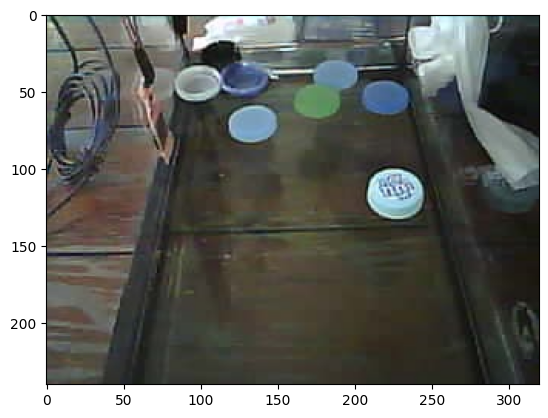

In [10]:
image_string = image_string.strip().split(',')[1] 
image = image_from_base64(image_string)
image = np.array(image)

plt.imshow(image)
plt.show()

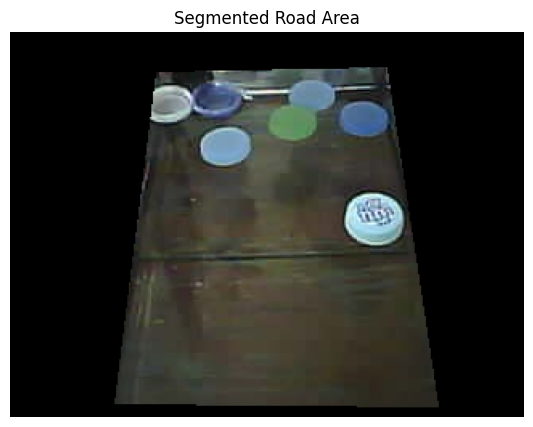

In [11]:
segment = AreaSegmentor(image)
segment.display_segmented_road()

In [12]:
def count_specific_color(image_input, lower, upper, eps=6, min_samples=100):
    """
    Apply DBSCAN clustering to count the number of objects of a specific color by clustering pixels in the image.
    
    Args:
    - image_input: Input image (RGB format).
    - lower: Lower bound of the target color in HSV (H, S, V).
    - upper: Upper bound of the target color in HSV (H, S, V).
    - eps: Maximum distance between two samples for them to be considered in the same cluster.
    - min_samples: Minimum number of samples in a neighborhood to form a cluster.
    
    Returns:
    - num_cluster: The number of detected color-based clusters.
    """

    hsv_image = cv.cvtColor(image_input, cv.COLOR_RGB2HSV)

    mask = cv.inRange(hsv_image, lower, upper)
    target_pixels = np.where(mask > 0)
    coords = np.column_stack(target_pixels)

    if coords.size == 0:
        print("No matching pixels found for the specified color.")
        return 0

    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(coords)

    unique_labels = set(labels)
    num_cluster = len([label for label in unique_labels if label != -1])

    # Optional: Visualize the mask and clusters
    plt.imshow(mask, cmap='gray')
    plt.scatter(coords[:, 1], coords[:, 0], c=labels, cmap='tab10', marker='o', s=10)
    plt.title(f"Detected cluster: {num_cluster}")
    plt.show()

    return num_cluster


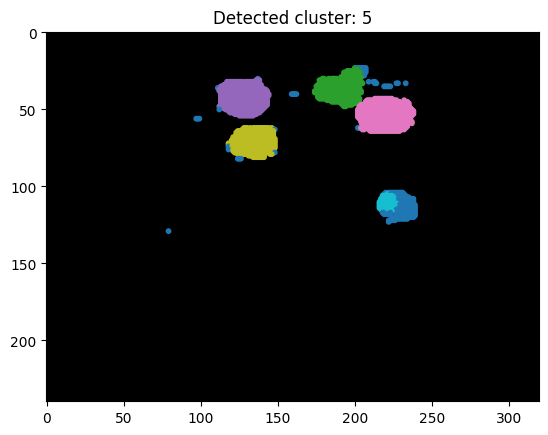

Number of detected blue bottle caps (cluster): 5


In [13]:
lower_blue = (100, 50, 50)
upper_blue = (130, 255, 255)

area_segmentor = AreaSegmentor(image)
image = area_segmentor.segment_road()
num = count_specific_color(image, lower=lower_blue, upper=upper_blue)

print(f"Number of detected blue bottle caps (cluster): {num}")

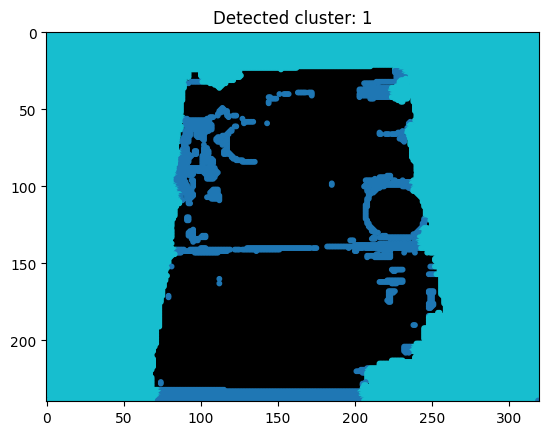

Number of detected black bottle caps (cluster): 0


In [14]:
lower_black = (0, 0, 0)
upper_black = (180, 255, 50)

area_segmentor = AreaSegmentor(image)
image = area_segmentor.segment_road()
num = count_specific_color(image, lower=lower_black, upper=upper_black)

print(f"Number of detected black bottle caps (cluster): {num - 1}")

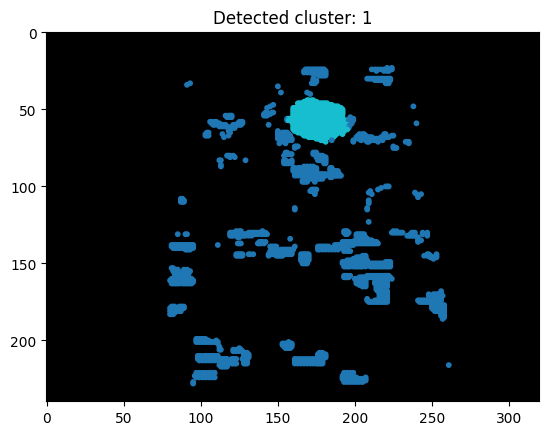

Number of detected green bottle caps (cluster): 1


In [15]:
lower_green = (35, 50, 50)
upper_green = (85, 255, 255)

area_segmentor = AreaSegmentor(image)
image = area_segmentor.segment_road()
num = count_specific_color(image, lower=lower_green, upper=upper_green)

print(f"Number of detected green bottle caps (cluster): {num}")

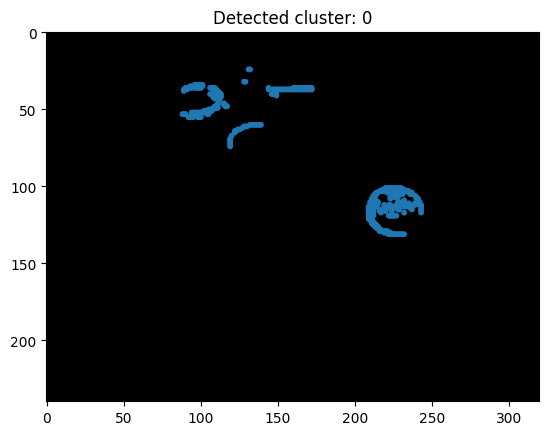

Number of detected white bottle caps (cluster): 0


In [16]:
lower_white = (0, 0, 200)
upper_white = (180, 55, 255)

area_segmentor = AreaSegmentor(image)
image = area_segmentor.segment_road()
num = count_specific_color(image, lower=lower_white, upper=upper_white)

print(f"Number of detected white bottle caps (cluster): {num}")

In [17]:
with open('emails.txt', mode='r', encoding='utf-8') as f:
    lines = f.readlines()

lines = list(set(lines))
lines[0].split('\n')[0]

'phantomgunorsoul@gmail.com'